## **Import Libraries**

AMIN FATHI - 4007220102

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

## **Training Samples**

In [3]:
X = np.array([[1   , 0.7 , 0.1 ],
              [1   , 1   , 1   ],
              [0.25, 0.95, 0.9 ],
              [0.1 , 0.95, 0.85],
              [0.87, 0   , 0.1 ],
              [0.82, 0.2 , 0.14],
              [0.8 , 0.2 , 0.2 ],
              [0   , 0.85, 1   ],
              [1   , 0   , 0   ],
              [0.17, 1   , 0.8 ],
              [0.9 , 0.1 , 0.1 ],
              [0.85, 0.2 , 0.2 ],
              [0.2 , 0.9 , 0.8 ],
              [0.3 , 0.9 , 0.9 ],
              [0   , 1   , 1   ],
              [0.1 , 0.85, 0.9 ],
              [0.92, 0.15, 0.1 ],
              [1   , 0.13, 0.2 ]])
X.shape
print(type(X))



<class 'numpy.ndarray'>


In [4]:
Y = np.array([[0],
              [1],
              [1],
              [1],
              [0],
              [0],
              [0],
              [1],
              [0],
              [1],
              [0],
              [0],
              [1],
              [1],
              [1],
              [1],
              [0],
              [0]])
Y.shape

(18, 1)

## **Plot Data in 3D**

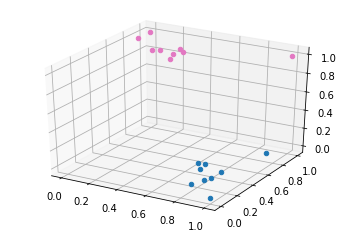

In [10]:
##### Plot Samples in 3D #####

fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining axes
for i in range(len(X)) :
  x=X[i][0]
  y=X[i][1]
  z=X[i][2]
  if int(Y[i]) == 0:
    ax.scatter(x , y, z,c='#1f77b4')
  else :
   ax.scatter(x , y, z,c='#e377c2')

plt.show()

## **LVQ1 Model Implementation From Scratch**

In [6]:
class LVQ :

    # Function here computes the winning vector
    # by Euclidean distance
    def winner( self, weights, sample ) :

        D0 =  np.linalg.norm( sample - weights[0])
        D1 =  np.linalg.norm(sample - weights[1] )

        if D0 < D1:
          return 0
        else:
          return 1

    # Function here updates the winning vector	
    def update( self, weights, sample, J, alpha ) :
        weights[J] = weights[J] + alpha * ( sample - weights[J] )

## **Train Model**

In [7]:
# weight initialization ( n, c )
list1 = X.tolist()
list2 = Y.tolist()
list2.pop(0)
list2.pop(0)

m, n = len( list1 ), len( list1[0] )
weights = []
weights.append( list1.pop(0 ) )
weights.append( list1.pop( 0 ) )
U = np.array(list1)
Y2 = np.array(list2)


# Samples used in weight initialization will
# not use in training
m = m - 2

# training
ob = LVQ()
epochs = 20
alpha = 0.3

for i in range( epochs ) :
    for j in range( m ) :

        # Sample selection
        T = U[j]

        # Compute winner
        J = ob.winner( weights, T )

        # Update weights
        ob.update( weights, T, J, alpha )

## **Plot Data in 3D**

[array([0.92700279, 0.13512269, 0.14663957]), array([0.12376601, 0.91451899, 0.9071994 ])]
[0.92700279 0.13512269 0.14663957]
[0.12376601 0.91451899 0.9071994 ]


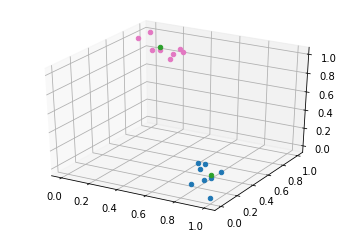

In [12]:

##### Plot Samples Again To Observe The Changes In Prototypes After Training #####


list2.pop(1)
list2.pop(1)
arr = np.array(list1)
fig = plt.figure()
arr2 = np.array(list2)
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
print(weights)
#  Weights(2,3)
for X1 in weights:
  print(X1)

  x=X1[0]
  y=X1[1]
  z=X1[2]
  ax.scatter(x, y, z, c = '#2ca02c')

# data (16 ,3)
for i in range(len(U)) :
  x=U[i][0]
  y=U[i][1]
  z=U[i][2]
  if int(Y2[i]) == 0:
    ax.scatter(x , y, z,c='#1f77b4')
  else :
   ax.scatter(x , y, z,c='#e377c2')

plt.show()

## **Test Model**

In [9]:
##### Test The Model With The Given Sample #####
test_sample = np.array([[0.19, 0.93, 0.88]])
# classify new input sample
J = ob.winner( weights, test_sample[0] )
print( "Sample T belongs to class : ", J )


Sample T belongs to class :  1
